In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
     

<h1>FETCHING DATA SETS</h1>

In [4]:
vehicle_df = pd.read_csv("C:/Users/tufF17/Downloads/ElectricCarData_Norm.csv")
ev_df = pd.read_csv("C:/Users/tufF17/Downloads/EV Stats-1.csv")

In [5]:
vehicle_df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [6]:
ev_df

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,...,31,Total,27549,14069,112538,389,720,105571,27,260863
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Assam,463,138,1006,0,117,151,0,1875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Bihar,252,430,2148,6,64,271,0,3171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Delhi,1395,251,5018,0,1,12695,21,19381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Goa,0,0,0,0,0,513,1,514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Gujarat,7182,217,8476,0,4,15388,0,31267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Haryana,3162,1504,13908,113,24,4878,0,23589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Himachal Pradesh,0,0,0,0,0,98,0,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Jammu & Kashmir,2,76,152,0,0,208,0,438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>EXPLORATORY DATA ANALYSIS</h1>

In [23]:
vehicle_df.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [24]:
ev_df.describe()

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Unnamed: 10,...,31,Total,27549,14069,112538,389,720,105571,27,260863
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
vehicle_df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [26]:
ev_df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,...,31,Total,27549,14069,112538,389,720,105571,27,260863
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Assam,463,138,1006,0,117,151,0,1875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Bihar,252,430,2148,6,64,271,0,3171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Delhi,1395,251,5018,0,1,12695,21,19381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print('Vehicle DF Shape: ', vehicle_df.shape)
print('EV DF Shape: ', ev_df.shape)

Vehicle DF Shape:  (103, 14)
EV DF Shape:  (30, 23)


<h2>Statewise two wheelers in India</h2>

<h3>Category L1 and L2</h3>

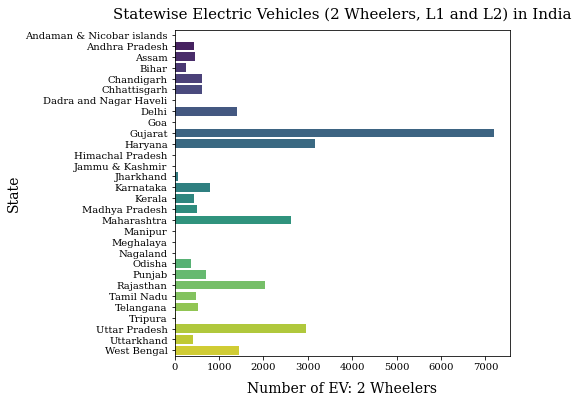

In [31]:
plt.figure(figsize=(6, 6))
sns.barplot(data=ev_df, y=ev_df['State'].sort_values(ascending=True), x=ev_df['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'], palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers, L1 and L2) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Observation: Gujarat, Haryana, Maharastra, Uttar Pradesh and Rajasthan are among the top states with the majority of EV 2-wheelers while Himachal Pradesh, J&K, Goa, Manipur, Tripura, Meghalaya and Nagaland with the least.

<h3> Category L2 (CMVR) </h3>

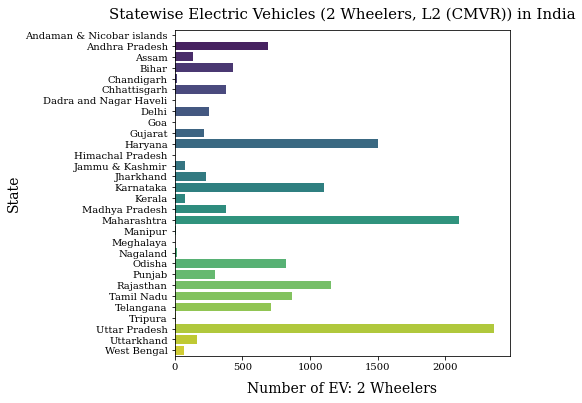

In [33]:
plt.figure(figsize=(6, 6))
sns.barplot(data=ev_df, y=ev_df['State'].sort_values(ascending=True), x=ev_df['Two Wheelers (Category L2 (CMVR))'], palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers, L2 (CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Observation: Uttar Pradesh, Maharastra, Haryana,Tamil Nadu and Karnataka are among the top states with the majority of EV 2-wheelers (L2 CMVR) while Himachal Pradesh, J&K, Goa, Manipur, Tripura, Meghalaya and Nagaland with the least.

<h3>Two Wheelers (Power<250W)</h3>

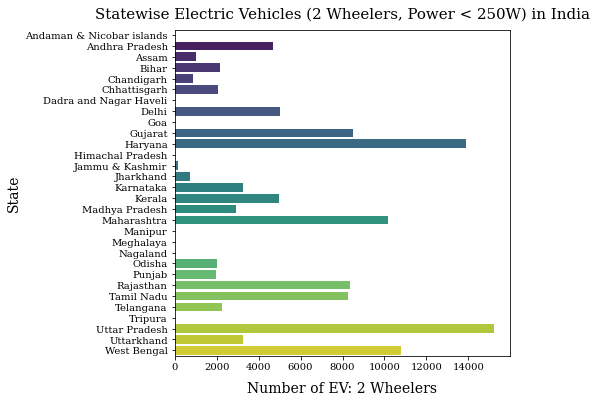

In [35]:
plt.figure(figsize=(6, 6))
sns.barplot(data=ev_df, y=ev_df['State'].sort_values(ascending=True), x=ev_df['Two Wheelers (Max power not exceeding 250 Watts)'], palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers, Power < 250W) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Observation: Uttar Pradesh, Maharastra, Haryana, Gujarat, Tamil Nadu and Karnataka are among the top states with the majority of EV 2-wheelers (Power < 250W) while Himachal Pradesh, J&K, Goa, Manipur, Tripura, Meghalaya and Nagaland with the least.

<h2> Statewise three wheelers in India </h2> 
<h3> Category L5: Slow Speed </h3>

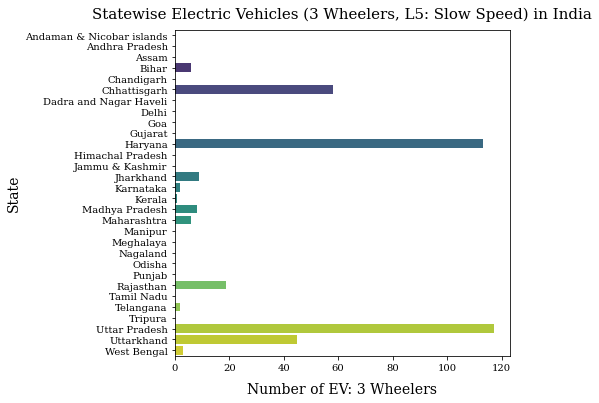

In [36]:
plt.figure(figsize=(6, 6))
sns.barplot(data=ev_df, y=ev_df['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 slow speed as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers, L5: Slow Speed) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Observation: Uttar Pradesh, Haryana, Chattisgarh, Uttarkhand and Rajasthan are among the top states with the majority of EV 3-wheelers (L5: Slow Speed) while the remaining states aren't dependent on this segment as much.

<h3> Category L5 (CVRM) </h3>

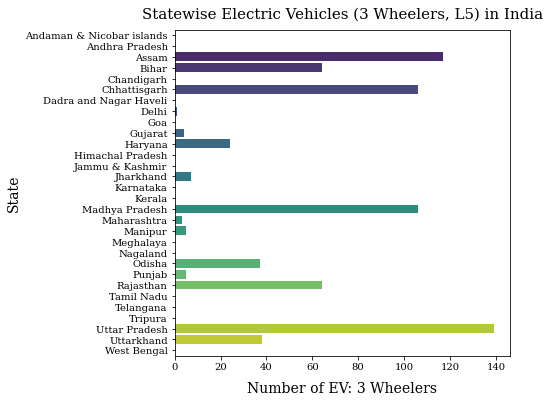

In [38]:
plt.figure(figsize=(6, 6))
sns.barplot(data=ev_df, y=ev_df['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers, L5) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Observation: Uttar Pradesh, Assam, Chattisgarh, Madhya Pradesh and Rajasthan are among the top states with the majority of EV 3-wheelers (L5: CVRM) while Andra Pradesh, Chandigarh, Goa, Meghalaya, Nagaland, TN, Telengana and Tripura with the least.

<h3> Statewise Electric Passenger Cars in India </h3>


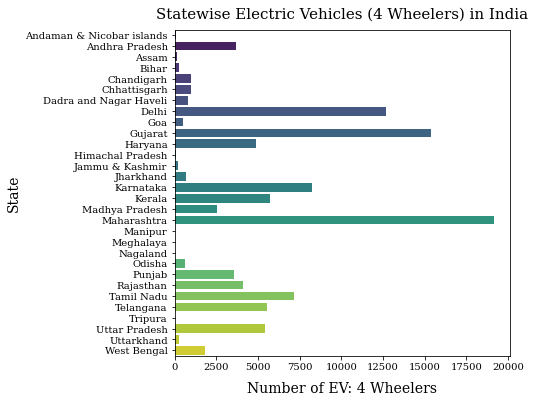

In [43]:
plt.figure(figsize=(6, 6))
sns.barplot(data=ev_df, y=ev_df['State'].sort_values(ascending=True), x='Passenger Cars (Category M1 as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Observation: Maharashtra, Gujarat, Delhi, Karnataka and Tamil Nadu are among the top states with the majority of EV 4-wheelers  while Himachal Pradesh, Manipur, Meghalaya, Nagaland, and Tripura with the least.

<h3> Statewise Electric Buses in India </h3>


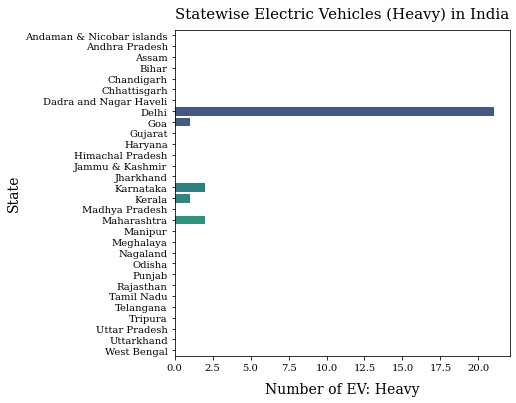

In [7]:
plt.figure(figsize=(6, 6))
sns.barplot(data=ev_df, y=ev_df['State'].sort_values(ascending=True), x='Buses', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Heavy', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Heavy) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Observation: Delhi, Maharashtra, Karnataka, Kerala and Goa are among the top states with the majority of EV Buses while rest of the states aren't in the segment yet.

<h2>Analysis of EV's in India</h2>

<h3> Based on Brand </h3>

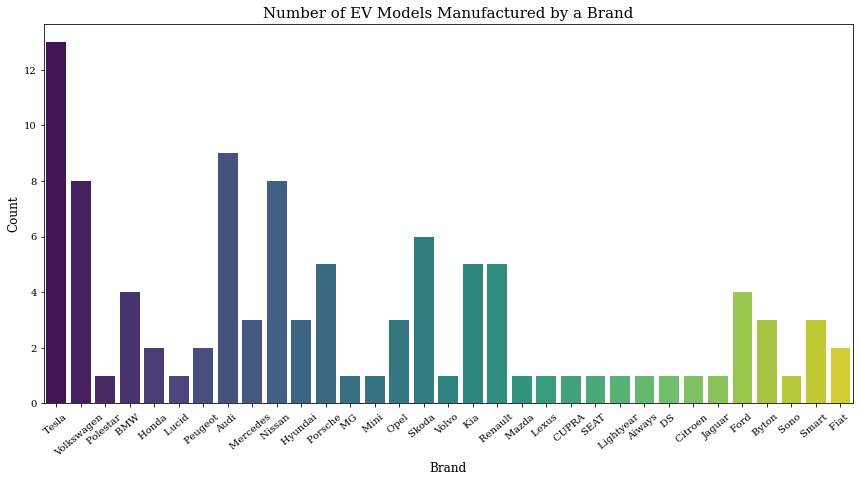

In [47]:
#Count of EV's by brand
sns.catplot(data=vehicle_df, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

Observation: Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

<h3> Different body types of EV's </h3>

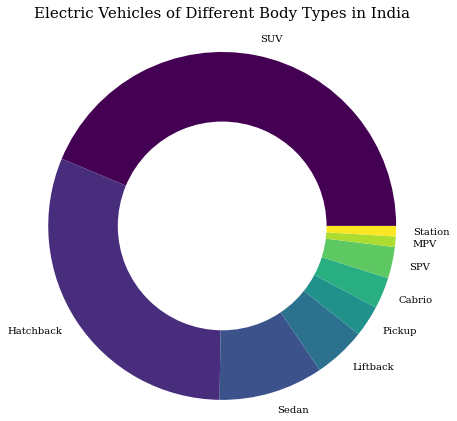

In [49]:
x = vehicle_df['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

Observation: SUV and Hatchback body types form the majority while Station and MPV the minority.

<h3> Different segments of EV's </h3>

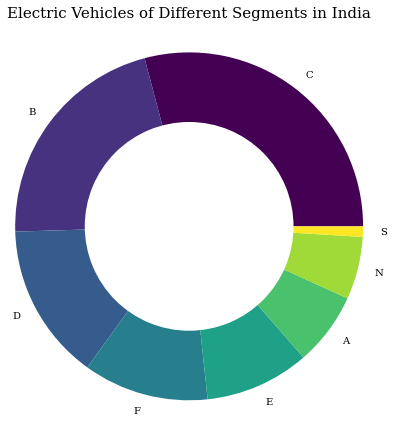

In [51]:
x = vehicle_df['Segment'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()
     

Observation: B and C body segments form the majority while S and A the minority.

<h3> Seat Numbers </h3>

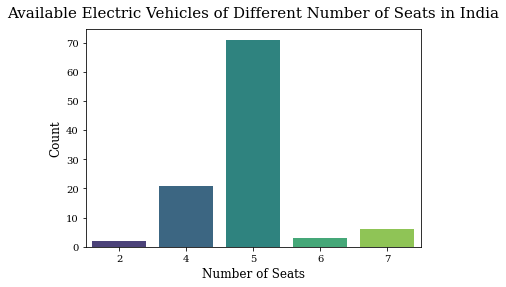

In [54]:
sns.countplot(data=vehicle_df, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()
     

Observation: EVs with 5 sitters dominate the market while EVs with 2 sitters are less in number.

<h3> Number of seats by each brand </h3>

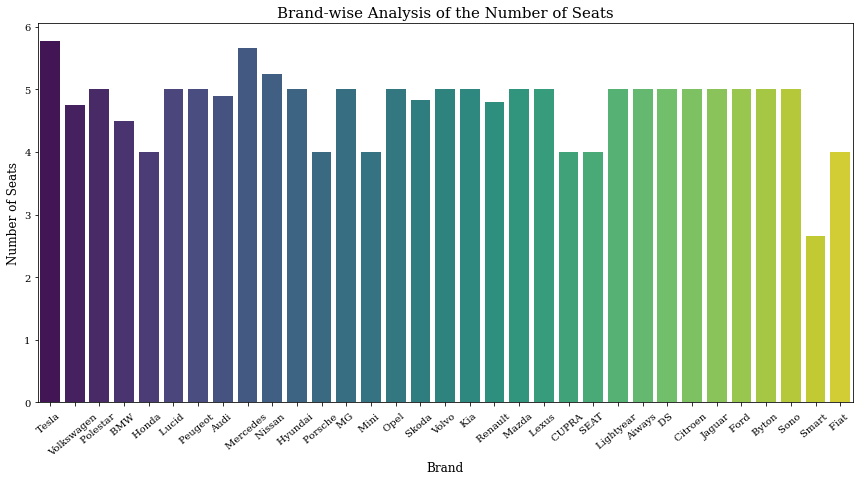

In [56]:
sns.catplot(kind='bar', data=vehicle_df, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);
     

Observation: Based on the number of seats, Tesla, Mercedes and Nissan have the maximum number of seats and Smart the minimum.

<h3> Different plug types </h3>

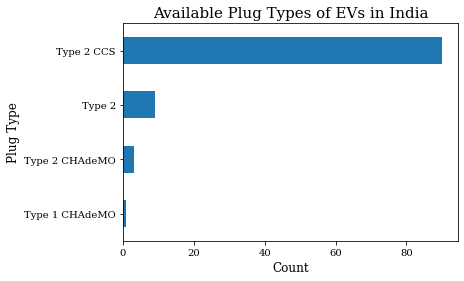

In [58]:
vehicle_df['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()
     

Observation: EVs with plus type of 'Type 2 CCS' seem to dominate the market.

<h3> Price Comparison </h3>

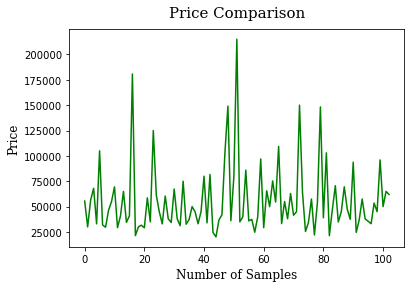

In [61]:
plt.plot(vehicle_df['PriceEuro'], color='green')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

<h3> Acceleration (km/h) </h3>

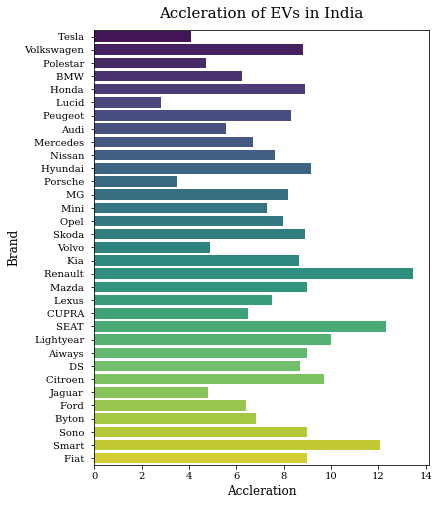

In [79]:
plt.figure(figsize=(6, 8))
sns.barplot(data=vehicle_df, y='Brand', x='Accel', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

Observation: Based on accleration, EVs from Renault, Seat and Smart are the top performers while Tesla, Lucid and Porsche dont make it to the same.



<h3> Top Speed (Km/h)</h3>


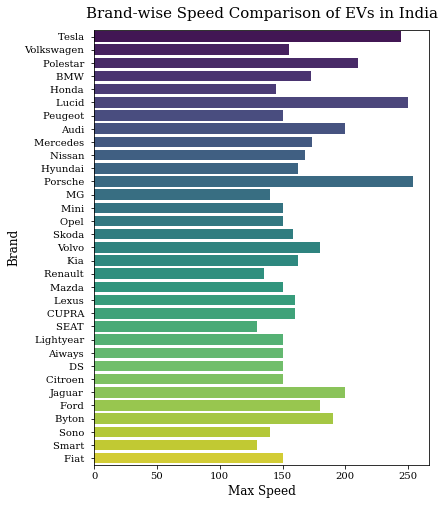

In [77]:
plt.figure(figsize=(6, 8))
sns.barplot(data=vehicle_df, x='TopSpeed', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

Observation: Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart and SEAT dont make it to the same.

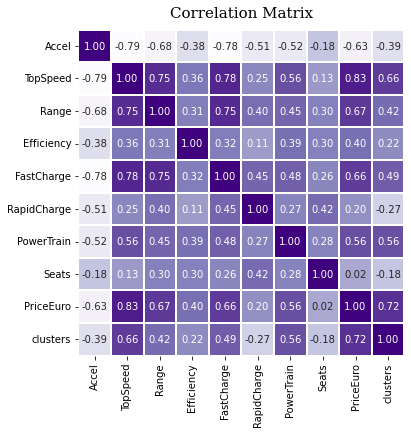

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(data=vehicle_df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);
     

<h3> Range (Km) </h3>

Text(0.5, 1.0, 'Brand-wise Analysis of the Range Parameter')

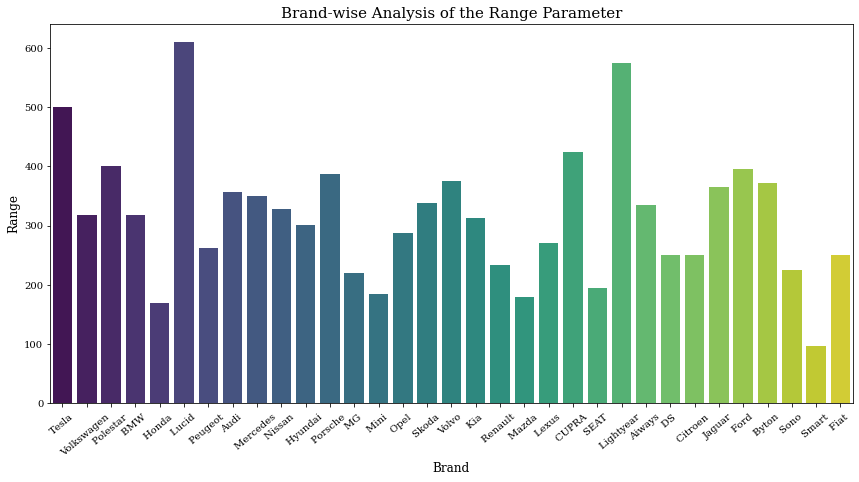

In [88]:
sns.catplot(kind='bar', data=vehicle_df, x='Brand', y='Range', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15)

Observation: Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.

<h2> Model Building Using K-Means Clusteing </h2>

In [8]:

vehicle_df['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)


vehicle_df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
     

In [9]:
vehicle_df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,2,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,0,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,1,2,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,0,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,1,0,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,1,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,2,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,2,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,2,Type 2 CCS,Hatchback,C,5,65000


In [10]:
# selecting features for building a model
X = vehicle_df[['Accel','TopSpeed','Efficiency','FastCharge', 'Range', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]
     

# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
     

# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.327343,0.251058,-1.285910,-0.589550,0.741695,-1.336093,0.333731,-0.793532,-0.359102
1,-1.917169,-0.570523,-0.703815,0.599540,0.204536,0.345406,-0.399780,0.248018,-0.324925
2,1.528789,0.025753,-0.380455,-0.682523,0.108181,-0.727058,0.280288,0.031797,-0.086851
3,0.259288,-0.100156,-0.252992,1.609250,-0.149788,0.178422,-0.433796,-0.289689,0.186040
4,-2.566457,0.257976,-0.791391,0.322834,-0.899487,0.341113,-0.502423,0.126064,-0.165389


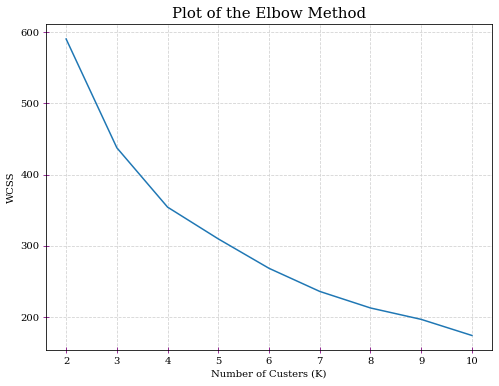

In [15]:
wcss = []

for i in range(2, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [16]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)
     

KMeans(n_clusters=4, random_state=90)

In [17]:
print(kmean.labels_)

[3 0 1 0 0 3 0 0 0 1 1 0 0 0 0 0 3 0 0 0 0 1 0 3 3 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 3 0 1 0 0 0 0 3 3 0 1 3 0 0 1 0 0 2 0 3 0 1 0 1 0 3 0 1 2 1 0 1 3 1
 0 0 1 2 1 3 0 1 2 0 1 0 1 1 1 0 1 2 0 1 0 0 0 0 0 1 1 1 1]


In [18]:
pd.Series(kmean.labels_).value_counts()

0    55
1    30
3    13
2     5
dtype: int64

In [19]:
vehicle_df['clusters'] = kmean.labels_

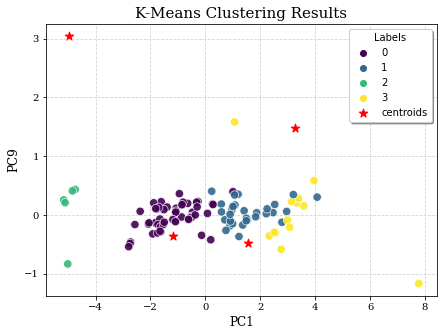

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()